<class 'pandas.core.frame.DataFrame'>
Index: 166821 entries, 1 to 545914
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     166821 non-null  int64  
 1   Product_ID                  166821 non-null  object 
 2   Gender                      166821 non-null  object 
 3   Age                         166821 non-null  object 
 4   Occupation                  166821 non-null  int64  
 5   City_Category               166821 non-null  object 
 6   Stay_In_Current_City_Years  166821 non-null  object 
 7   Marital_Status              166821 non-null  int64  
 8   Product_Category_1          166821 non-null  int64  
 9   Product_Category_2          166821 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    166821 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 16.5+ MB
None
            Us

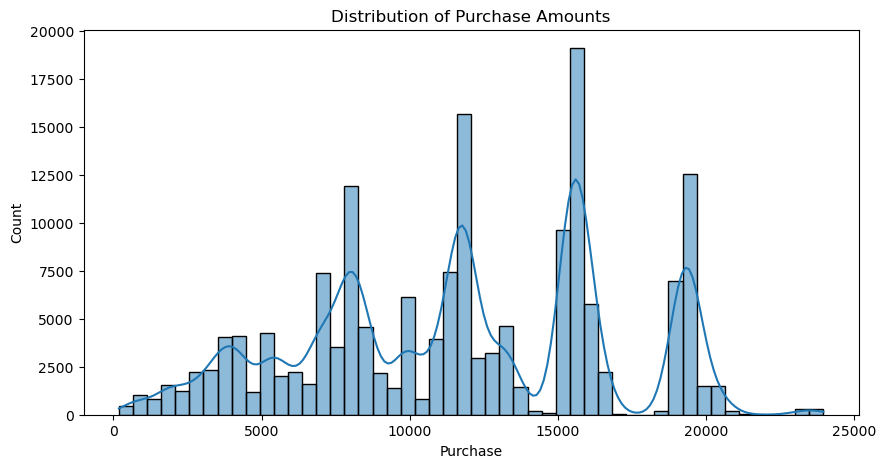

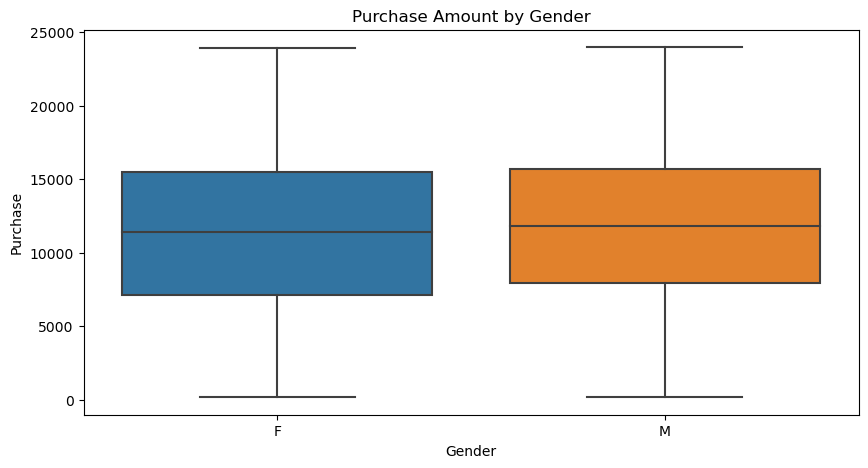

Linear Regression R^2 Score: 0.1616
Ridge Regression R^2 Score: 0.1616
Lasso Regression R^2 Score: 0.1617


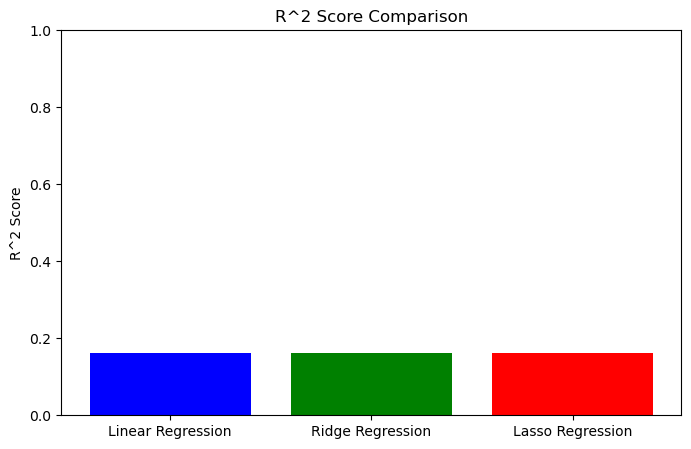

Best Model: Lasso Regression with R^2 Score of 0.1617


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score

# Step 1: Load the dataset
df = pd.read_csv("C:\\Users\\CVR\\Downloads\\black-friday.csv")

# Step 2: Clean the dataset (handling missing values, duplicates, etc.)
df.dropna(inplace=True)  # Drop missing values
df.drop_duplicates(inplace=True)

# Step 3: Perform EDA analysis
print(df.info())
print(df.describe())

# Step 4: Generate visualizations
plt.figure(figsize=(10, 5))
sns.histplot(df['Purchase'], bins=50, kde=True)
plt.title("Distribution of Purchase Amounts")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x='Gender', y='Purchase', data=df)
plt.title("Purchase Amount by Gender")
plt.show()

# Step 6: Create Feature selection variables
X = df[['Age', 'Occupation', 'Product_Category_1']] 
X = pd.get_dummies(X, drop_first=True)

# Step 7: Select Target Variable
y = df['Purchase']

# Step 8: Split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 9: Implement Linear Regression, Ridge, and Lasso
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1)
}

r2_scores = {}

# Train and evaluate models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2_scores[name] = r2_score(y_test, y_pred)
    print(f"{name} R^2 Score: {r2_scores[name]:.4f}")

# Step 10: Compare R^2 scores using Matplotlib
plt.figure(figsize=(8, 5))
plt.bar(r2_scores.keys(), r2_scores.values(), color=['blue', 'green', 'red'])
plt.title("R^2 Score Comparison")
plt.ylabel("R^2 Score")
plt.ylim(0, 1)
plt.show()

# Step 11: Identify the best model
best_model = max(r2_scores, key=r2_scores.get)
print(f"Best Model: {best_model} with R^2 Score of {r2_scores[best_model]:.4f}")
